In [2]:
from qiskit import *

In [3]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1], [0,1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

In [4]:
BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator') from BasicAer()>,
 <StatevectorSimulatorPy('statevector_simulator') from BasicAer()>,
 <UnitarySimulatorPy('unitary_simulator') from BasicAer()>]

In [5]:
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>,
 <PulseSimulator('pulse_simulator') from AerProvider()>]

In [8]:
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-04-13 21:51:09,041: Credentials are already in use. The existing account in the session will be replaced.


In [9]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [10]:
from qiskit.tools.monitor import job_monitor

In [14]:
backend = BasicAer.get_backend('qasm_simulator')
new_circuit=transpile(circuit,backend)
new_circuit.draw()

┌──────────┐     ┌─┐   
q_0: ┤ U2(0,pi) ├──■──┤M├───
     └──────────┘┌─┴─┐└╥┘┌─┐
q_1: ────────────┤ X ├─╫─┤M├
                 └───┘ ║ └╥┘
c_0: ══════════════════╩══╬═
                          ║ 
c_1: ═════════════════════╩═

In [15]:
job = backend.run(assemble(new_circuit))
result = job.result()
counts1 = result.get_counts()
print(counts1)

{'11': 510, '00': 514}


In [18]:
backend = provider.get_backend('ibmq_qasm_simulator')
new_circuit=transpile(circuit,backend)
new_circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

In [19]:
job = backend.run(assemble(new_circuit))
result = job.result()
counts2 = result.get_counts()
print(counts2)

{'11': 518, '00': 506}


In [20]:
backend = provider.get_backend('ibmq_burlington')
new_circuit=transpile(circuit,backend)
new_circuit.draw()

┌──────────┐     ┌─┐   
      q_0 -> 0 ┤ U2(0,pi) ├──■──┤M├───
               └──────────┘┌─┴─┐└╥┘┌─┐
      q_1 -> 1 ────────────┤ X ├─╫─┤M├
                           └───┘ ║ └╥┘
ancilla_0 -> 2 ──────────────────╫──╫─
                                 ║  ║ 
ancilla_1 -> 3 ──────────────────╫──╫─
                                 ║  ║ 
ancilla_2 -> 4 ──────────────────╫──╫─
                                 ║  ║ 
          c_0: ══════════════════╩══╬═
                                    ║ 
          c_1: ═════════════════════╩═

In [23]:
job = backend.run(assemble(new_circuit))
job_monitor(job)
result = job.result()
counts3 = result.get_counts()
print(counts3)

Job Status: job has successfully run
{'01': 157, '00': 446, '11': 329, '10': 92}


In [24]:
backend = provider.get_backend('ibmq_16_melbourne')
new_circuit=transpile(circuit,backend)
new_circuit.draw()

┌──────────┐     ┌─┐   
        q_0 -> 0 ┤ U2(0,pi) ├──■──┤M├───
                 └──────────┘┌─┴─┐└╥┘┌─┐
        q_1 -> 1 ────────────┤ X ├─╫─┤M├
                             └───┘ ║ └╥┘
  ancilla_0 -> 2 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_1 -> 3 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_2 -> 4 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_3 -> 5 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_4 -> 6 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_5 -> 7 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_6 -> 8 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_7 -> 9 ──────────────────╫──╫─
                                   ║  ║ 
 ancilla_8 -> 10 ──────────────────╫──╫─
                                   ║  ║ 
 ancilla_9 -> 11 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_10 -> 12 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_11 -> 13 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_12 -> 14 ──────────────────╫──╫─
                                   ║  ║ 
            c_0: ══════════════════╩══╬═
                                      ║ 
            c_1: ═════════════════════╩═

In [31]:
job = backend.run(assemble(new_circuit))
job_monitor(job)
result = job.result()
counts4 = result.get_counts()
print(counts4)

Job Status: job has successfully run
{'01': 52, '00': 507, '11': 443, '10': 22}


In [28]:
from qiskit.visualization import plot_histogram

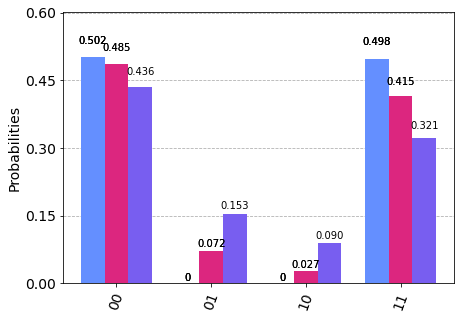

In [30]:
plot_histogram([counts1,counts4, counts3])